In [2]:
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn

In [3]:
titanic_df = pd.read_csv("train.csv")
test_df    = pd.read_csv("test.csv")

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

Text(0,0.5,'Survival Rate')

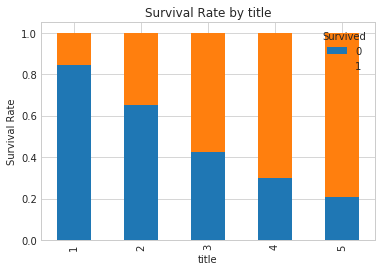

In [5]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'Unknown'

def title_map(title):
    if title in ['Mr']:
        return 1
    elif title in ['Master']:
        return 3
    elif title in ['Ms','Mlle','Miss']:
        return 4
    elif title in ['Mme','Mrs']:
        return 5
    else:
        return 2
    
titanic_df['title'] = titanic_df['Name'].apply(get_title).apply(title_map)   
test_df['title'] = test_df['Name'].apply(get_title).apply(title_map)
title_xt = pd.crosstab(titanic_df['title'], titanic_df['Survived'])
title_xt_pct = title_xt.div(title_xt.sum(1).astype(float), axis=0)

title_xt_pct.plot(kind='bar', 
                  stacked=True, 
                  title='Survival Rate by title')
plt.xlabel('title')
plt.ylabel('Survival Rate')

In [6]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [7]:
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)
#print(embark_dummies_titanic)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
#print(titanic_df)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

In [13]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

titanic_df.loc[ titanic_df['Fare'] <= 7.91, 'Fare'] = 0
titanic_df.loc[(titanic_df['Fare'] > 7.91) & (titanic_df['Fare'] <= 14.454), 'Fare'] = 1
titanic_df.loc[(titanic_df['Fare'] > 14.454) & (titanic_df['Fare'] <= 31), 'Fare'] = 2
titanic_df.loc[ titanic_df['Fare'] > 31, 'Fare'] = 3
test_df.loc[ test_df['Fare'] <= 7.91, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.91) & (test_df['Fare'] <= 14.454), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 14.454) & (test_df['Fare'] <= 31), 'Fare'] = 2
test_df.loc[test_df['Fare'] > 31, 'Fare'] = 3

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

In [19]:
titanic_df['Age'] = titanic_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))
test_df['Age'] = test_df.groupby(['Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [20]:
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)

titanic_df.loc[ titanic_df['Age'] <= 16, 'Age'] = 0
titanic_df.loc[(titanic_df['Age'] > 16) & (titanic_df['Age'] <= 32), 'Age'] = 1
titanic_df.loc[(titanic_df['Age'] > 32) & (titanic_df['Age'] <= 48), 'Age'] = 2
titanic_df.loc[(titanic_df['Age'] > 48) & (titanic_df['Age'] <= 64), 'Age'] = 3
titanic_df.loc[(titanic_df['Age'] > 64), 'Age'] = 4

test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[(test_df['Age'] > 64), 'Age'] = 4

In [21]:
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [22]:
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0


titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)


/home/sam-shaikh/.local/lib/python3.5/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
#titanic_df.drop(['Person'],axis=1,inplace=True)
#test_df.drop(['Person'],axis=1,inplace=True)
sexes = sorted(titanic_df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
titanic_df['Sex'] = titanic_df['Sex'].map(genders_mapping).astype(int)
test_df['Sex'] = test_df['Sex'].map(genders_mapping).astype(int)

In [24]:
#titanic_df = titanic_df.join(pclass_dummies_titanic)
#test_df    = test_df.join(pclass_dummies_test)
titanic_df['age_class'] = titanic_df['Age'] * titanic_df['Pclass']
test_df['age_class'] = test_df['Age'] * test_df['Pclass']

In [25]:
titanic_df.head()
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,title,C,Q,Family,age_class
0,892,3,1,0,0,1,0,1,0,0
1,893,3,0,0,0,5,0,0,1,0
2,894,2,1,0,0,1,0,1,0,0
3,895,3,1,0,0,1,0,0,0,0
4,896,3,0,0,0,5,0,0,1,0


In [26]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [36]:
# With Random Forests Algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred_1 = random_forest.predict(X_test)

print ("Accuracy With Random Forests Algorithm: "+str(random_forest.score(X_train, Y_train)*100)+"%")

Accuracy With Random Forests Algorithm: 83.2772166105%


In [37]:
# With GradientBoosting Algorithm
gradient_boost = GradientBoostingClassifier(n_estimators=100)
gradient_boost.fit(X_train, Y_train)

Y_pred_2 = gradient_boost.predict(X_test)

print ("Accuracy With GradientBoosting Algorithm: "+str(gradient_boost.score(X_train, Y_train)*100)+"%")

Accuracy With GradientBoosting Algorithm: 83.2772166105%


In [38]:
# With ExtraTrees Algorithm
extra_tree = ExtraTreesClassifier(n_estimators=100)
extra_tree.fit(X_train, Y_train)

Y_pred_3 = extra_tree.predict(X_test)

print ("Accuracy With ExtraTrees Algorithm: "+str(extra_tree.score(X_train, Y_train)*100)+"%")

Accuracy With ExtraTrees Algorithm: 83.2772166105%
